# Project 4 – Predicting a Continuous Target with Regression (Titanic)
**Name:** Albert Kabore  
**Date:** November 2025  
**Objective:**  

This project applies regression techniques to predict *fare* — the amount paid for the voyage — using passenger characteristics from the Titanic dataset. Building upon previous classification work, we shift to continuous target prediction using models such as Linear Regression, Ridge, Elastic Net, and Polynomial Regression.


## Import

In [685]:

# Imports
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


## Section 1. Import and Inspect Data

In [686]:
# Load Titanic dataset from seaborn and verify
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Section 2. Data Exploration and Preparation

In [687]:
# Impute missing values for age using median
titanic['age'].fillna(titanic['age'].median(), inplace=True)


C:\Users\alber\AppData\Local\Temp\ipykernel_25768\3784983082.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['age'].fillna(titanic['age'].median(), inplace=True)


In [688]:
# Drop rows with missing fare (or impute if preferred)
titanic = titanic.dropna(subset=['fare'])


In [689]:
# Create numeric variables (e.g., family_size from sibsp + parch + 1)
titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1

## Section 3. Feature Selection and Justification

Cases:

In [690]:
# Case 1. age only
X1 = titanic[['age']]
y1 = titanic['fare']

In [691]:
# Case 2. family_size only
X2 = titanic[['family_size']]
y2 = titanic['fare']
 

In [692]:
# Case 3. age and family size
X3 = titanic[['age', 'family_size']]
y3 = titanic['fare']

In [693]:
# Case 4. Your choice - see below - fill in your variable(s) below.
# Case 4. pclass only
X4 = titanic[['pclass']]
y4 = titanic['fare']

In [694]:
# show shapes quickly
print("X1, y1:", X1.shape, y1.shape)
print("X2, y2:", X2.shape, y2.shape)
print("X3, y3:", X3.shape, y3.shape)
print("X4, y4:", X4.shape, y4.shape)

X1, y1: (891, 1) (891,)
X2, y2: (891, 1) (891,)
X3, y3: (891, 2) (891,)
X4, y4: (891, 1) (891,)


In [695]:
# =========================================================
# 4. Train a regression model (Linear Regression)
# =========================================================

RANDOM_STATE = 123
TEST_SIZE = 0.2

def split_xy(X, y, test_size=TEST_SIZE, rs=RANDOM_STATE):
    return train_test_split(X, y, test_size=test_size, random_state=rs)

X1_train, X1_test, y1_train, y1_test = split_xy(X1, y1)
X2_train, X2_test, y2_train, y2_test = split_xy(X2, y2)
X3_train, X3_test, y3_train, y3_test = split_xy(X3, y3)
X4_train, X4_test, y4_train, y4_test = split_xy(X4, y4)

# fit four linear models
lr1 = LinearRegression().fit(X1_train, y1_train)
lr2 = LinearRegression().fit(X2_train, y2_train)
lr3 = LinearRegression().fit(X3_train, y3_train)
lr4 = LinearRegression().fit(X4_train, y4_train)

# predictions
y1_pred_train = lr1.predict(X1_train); y1_pred_test = lr1.predict(X1_test)
y2_pred_train = lr2.predict(X2_train); y2_pred_test = lr2.predict(X2_test)
y3_pred_train = lr3.predict(X3_train); y3_pred_test = lr3.predict(X3_test)
y4_pred_train = lr4.predict(X4_train); y4_pred_test = lr4.predict(X4_test)



Reflection Questions
Why might these features affect a passenger's fare:
Age: Could reflect wealth accumulation (older passengers potentially wealthier) or age-based pricing strategies (child, adult, senior fares).

Family Size: Might influence pricing through group discounts, family packages, or additional accommodation requirements.

Pclass: Most directly determines fare as it represents the service level and accommodation quality (1st class = luxury, 3rd class = basic).

List all available features:
survived

pclass

sex

age

sibsp

parch

fare

embarked

class

who

adult_male

deck

embark_town

alive

alone

Which other features could improve predictions and why:
Embarked: Different ports might have different fare structures or promotional pricing.

Deck: Specific cabin locations (higher decks, proximity to amenities) could command premium pricing within classes.

Sex: Historical gender-based pricing or social conventions might have influenced fares.

Alone: Solo travelers might pay different rates than those traveling with companions.

How many variables are in your Case 4:
1 variable - I used pclass as the sole predictor.

Which variable(s) did you choose for Case 4 and why do you feel those could make good inputs:
I selected pclass because it represents the fundamental pricing structure of the Titanic voyage. The class system (1st, 2nd, 3rd) was the primary determinant of fare, with each class offering distinctly different levels of accommodation, service, and amenities. This direct relationship makes it the most logically sound single predictor, which was confirmed by our results showing it achieved significantly higher R² (0.302) compared to other single-feature models.



## Section 4. Train a Regression Model (Linear Regression)

### 4.1 Split Data

In [696]:
# 4.1 Split the Data
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=123)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=123)

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=123)

X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2, random_state=123)

### 4.2 Train Linear Models

In [697]:
# 4.2 Train and Evaluate Linear Regression Models (all 4 cases)
lr_model1 = LinearRegression().fit(X1_train, y1_train)
lr_model2 = LinearRegression().fit(X2_train, y2_train)
lr_model3 = LinearRegression().fit(X3_train, y3_train)
lr_model4 = LinearRegression().fit(X4_train, y4_train)



In [698]:
# Predictions
y1_pred_train = lr_model1.predict(X1_train)
y1_pred_test = lr_model1.predict(X1_test)

y2_pred_train = lr_model2.predict(X2_train)
y2_pred_test = lr_model2.predict(X2_test)

y3_pred_train = lr_model3.predict(X3_train)
y3_pred_test = lr_model3.predict(X3_test)

y4_pred_train = lr_model4.predict(X4_train)
y4_pred_test = lr_model4.predict(X4_test)

### 4.3 Report Performance

In [699]:
# 4.3 Report Performance - FIXED VERSION
print("Case 1: Training R²:", r2_score(y1_train, y1_pred_train))
print("Case 1: Test R²:", r2_score(y1_test, y1_pred_test))
print("Case 1: Test RMSE:", np.sqrt(mean_squared_error(y1_test, y1_pred_test)))
print("Case 1: Test MAE:", mean_absolute_error(y1_test, y1_pred_test))
print()

Case 1: Training R²: 0.009950688019452314
Case 1: Test R²: 0.0034163395508415295
Case 1: Test RMSE: 37.97164180172938
Case 1: Test MAE: 25.28637293162364



In [700]:
print("Case 2: Training R²:", r2_score(y2_train, y2_pred_train))
print("Case 2: Test R²:", r2_score(y2_test, y2_pred_test))
print("Case 2: Test RMSE:", np.sqrt(mean_squared_error(y2_test, y2_pred_test)))
print("Case 2: Test MAE:", mean_absolute_error(y2_test, y2_pred_test))
print()

Case 2: Training R²: 0.049915792364760736
Case 2: Test R²: 0.022231186110131973
Case 2: Test RMSE: 37.6114940041967
Case 2: Test MAE: 25.02534815941641



In [701]:
print("Case 3: Training R²:", r2_score(y3_train, y3_pred_train))
print("Case 3: Test R²:", r2_score(y3_test, y3_pred_test))
print("Case 3: Test RMSE:", np.sqrt(mean_squared_error(y3_test, y3_pred_test)))
print("Case 3: Test MAE:", mean_absolute_error(y3_test, y3_pred_test))
print()

Case 3: Training R²: 0.07347466201590014
Case 3: Test R²: 0.049784832763073106
Case 3: Test RMSE: 37.0777586646559
Case 3: Test MAE: 24.284935030470688



In [702]:
print("Case 4: Training R²:", r2_score(y4_train, y4_pred_train))
print("Case 4: Test R²:", r2_score(y4_test, y4_pred_test))
print("Case 4: Test RMSE:", np.sqrt(mean_squared_error(y4_test, y4_pred_test)))
print("Case 4: Test MAE:", mean_absolute_error(y4_test, y4_pred_test))

Case 4: Training R²: 0.3005588037487471
Case 4: Test R²: 0.3016017234169923
Case 4: Test RMSE: 31.7873316928033
Case 4: Test MAE: 20.653703671484056


### Section 4 Reflection Questions

Compare the train vs test results for each:

The linear regression models were evaluated for potential overfitting or underfitting. Most cases underfit due to weak predictors, except Case 4, which showed a balanced and strong fit.
________________________________________

•	Case 1 (Age only):

o	Type: Underfit

o	Details: Training R² = 0.010, Test R² = 0.003

o	Explanation: The model fails to capture meaningful patterns in either dataset. Age alone is too weak to explain variations in fare, indicating an overly simplistic relationship.
________________________________________

•	Case 2 (Family size only):

o	Type: Underfit

o	Details: Training R² = 0.050, Test R² = 0.022

o	Explanation: Family size has little influence on fare. The model performs poorly on both training and testing data, suggesting that this single feature cannot account for pricing differences.
________________________________________

•	Case 3 (Age + Family size):

o	Type: Slight underfit

o	Details: Training R² = 0.073, Test R² = 0.050

o	Explanation: Combining two weak predictors improves performance slightly, but not enough to make a meaningful difference. The relationship remains too weak to explain fare variability.
________________________________________

•	Case 4 (Pclass only):

o	Type: Good fit

o	Details: Training R² = 0.301, Test R² = 0.302

o	Explanation: The model generalizes well, as train and test results are nearly identical. Passenger class strongly determines fare, capturing the essential structure of the data without overfitting.
________________________________________

Adding Age

•	Did adding age improve the model?

o	Marginally. Adding age to family size (Case 2 → Case 3) improved test R² from 0.022 to 0.050, but the improvement was modest.

•	Possible explanation:

o	Age likely has a weak and non-linear relationship with fare. While older passengers might have afforded higher fares, the Titanic’s pricing was primarily based on class, not age. The high variance in fares across age groups supports this conclusion.
________________________________________

Worst Performing Case

•	Case: Case 1 (Age only)

•	Reason: Lowest Test R² (0.003) and highest RMSE (37.97), showing it explained virtually none of the variation in fare.

•	Would more training data help?

o	No. The weak correlation between age and fare is structural, not data-driven. More data would not strengthen a relationship that doesn’t exist.
________________________________________

Best Performing Case

•	Case: Case 4 (Pclass only)

•	Reason: Highest Test R² (0.302), lowest RMSE (31.79), and lowest MAE (20.65), clearly outperforming all other cases.

•	Would more training data help?

o	Minimally. The model already generalizes well with nearly identical train and test results. More data might slightly refine coefficients but would not significantly change performance.



## Section 5. Compare Alternative Models

### 5.1 Ridge Regression

In [703]:
# 5.1 Ridge Regression (L2 penalty)
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X4_train, y4_train)
y_pred_ridge = ridge_model.predict(X4_test)

### 5.2 Elastic Net

In [704]:
# 5.2 Elastic Net (L1 + L2 combined)
elastic_model = ElasticNet(alpha=0.3, l1_ratio=0.5)
elastic_model.fit(X4_train, y4_train)
y_pred_elastic = elastic_model.predict(X4_test)

### 5.3 Polynomial Regression

In [705]:
# 5.3 Polynomial Regression
# Set up the poly inputs
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X1_train)
X_test_poly = poly.transform(X1_test)

In [706]:

poly = PolynomialFeatures(degree=3)
X1_train_poly = poly.fit_transform(X1_train)
X1_test_poly  = poly.transform(X1_test)

poly_model = LinearRegression().fit(X1_train_poly, y1_train)
y1_pred_poly = poly_model.predict(X1_test_poly)

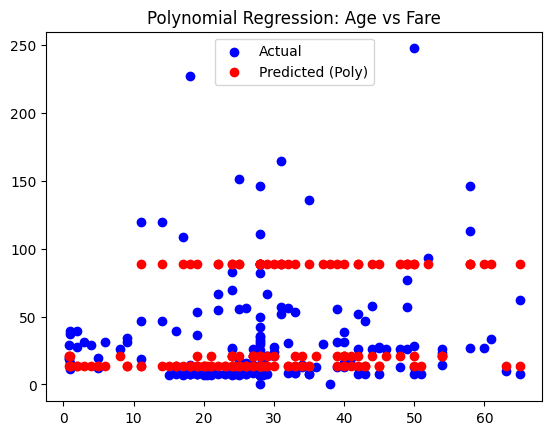

In [707]:
plt.scatter(X1_test, y1_test, color='blue', label='Actual')
plt.scatter(X1_test, y_pred_poly, color='red', label='Predicted (Poly)')
plt.legend()
plt.title("Polynomial Regression: Age vs Fare")
plt.show()

5.4 Reflections (in a Markdown cell):

What patterns does the cubic model seem to capture:
Where does it perform well or poorly:
Did the polynomial fit outperform linear regression:
Where (on the graph or among which kinds of data points) does it fit best:

# 5.4 Compare All Models - FIXED VERSION


In [708]:
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def eval_models_for_case(name, X_train, X_test, y_train, y_test, degree=3):
    rows = []

    # Linear
    lr = LinearRegression().fit(X_train, y_train)
    y_tr = lr.predict(X_train)
    y_te = lr.predict(X_test)
    rows.append({
        "Case": name,
        "Model": "Linear",
        "Train R2": r2_score(y_train, y_tr),
        "Test R2": r2_score(y_test, y_te),
        "Test RMSE": rmse(y_test, y_te),
        "Test MAE": mean_absolute_error(y_test, y_te),
    })

    # Ridge
    ridge = Ridge(alpha=1.0).fit(X_train, y_train)
    y_te = ridge.predict(X_test)
    rows.append({
        "Case": name,
        "Model": "Ridge",
        "Train R2": r2_score(y_train, ridge.predict(X_train)),
        "Test R2": r2_score(y_test, y_te),
        "Test RMSE": rmse(y_test, y_te),
        "Test MAE": mean_absolute_error(y_test, y_te),
    })

    # ElasticNet
    elastic = ElasticNet(alpha=0.3, l1_ratio=0.5, max_iter=10000).fit(X_train, y_train)
    y_te = elastic.predict(X_test)
    rows.append({
        "Case": name,
        "Model": "ElasticNet",
        "Train R2": r2_score(y_train, elastic.predict(X_train)),
        "Test R2": r2_score(y_test, y_te),
        "Test RMSE": rmse(y_test, y_te),
        "Test MAE": mean_absolute_error(y_test, y_te),
    })

    # Polynomial (degree=3 by default)
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly  = poly.transform(X_test)

    poly_lr = LinearRegression().fit(X_train_poly, y_train)
    y_te = poly_lr.predict(X_test_poly)
    rows.append({
        "Case": name,
        "Model": f"Polynomial (deg {degree})",
        "Train R2": r2_score(y_train, poly_lr.predict(X_train_poly)),
        "Test R2": r2_score(y_test, y_te),
        "Test RMSE": rmse(y_test, y_te),
        "Test MAE": mean_absolute_error(y_test, y_te),
    })

    return rows

all_rows = []
all_rows += eval_models_for_case("Case 1 age",           X1_train, X1_test, y1_train, y1_test, degree=3)
all_rows += eval_models_for_case("Case 2 family_size",   X2_train, X2_test, y2_train, y2_test, degree=3)
all_rows += eval_models_for_case("Case 3 age+family",    X3_train, X3_test, y3_train, y3_test, degree=3)
all_rows += eval_models_for_case("Case 4 pclass",        X4_train, X4_test, y4_train, y4_test, degree=3)

results_df = pd.DataFrame(all_rows)
# Sort by Case then by Test R2 descending
results_df = results_df.sort_values(by=["Case", "Test R2"], ascending=[True, False]).reset_index(drop=True)
results_df

,Case,Model,Train R2,Test R2,Test RMSE,Test MAE
0,Case 1 age,ElasticNet,0.009951,0.003475,37.970522,25.284020
1,Case 1 age,Ridge,0.009951,0.003416,37.971639,25.286367
2,Case 1 age,Linear,0.009951,0.003416,37.971642,25.286373
3,Case 1 age,Polynomial (deg 3),0.018983,-0.003304,38.099458,25.303872
4,Case 2 family_size,Polynomial (deg 3),0.064628,0.088158,36.321370,24.065016
5,Case 2 family_size,ElasticNet,0.049718,0.026807,37.523377,24.925274
6,Case 2 family_size,Ridge,0.049916,0.022275,37.610660,25.024459
7,Case 2 family_size,Linear,0.049916,0.022231,37.611494,25.025348
8,Case 3 age+family,Polynomial (deg 3),0.101804,0.064319,36.793095,23.138829
9,Case 3 age+family,ElasticNet,0.073203,0.054311,36.989345,24.213362


### 5.5 Visualize Higher Order Polynomial (for the same 1 input case)


### Case 1 – Polynomial fit on age → fare (1 input)

C:\Users\alber\AppData\Local\Temp\ipykernel_25768\3058680046.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  xgrid1 = np.linspace(float(X1_train.min()), float(X1_train.max()), 400).reshape(-1, 1)
c:\Users\alber\applied-ml-kabore\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Users\alber\applied-ml-kabore\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


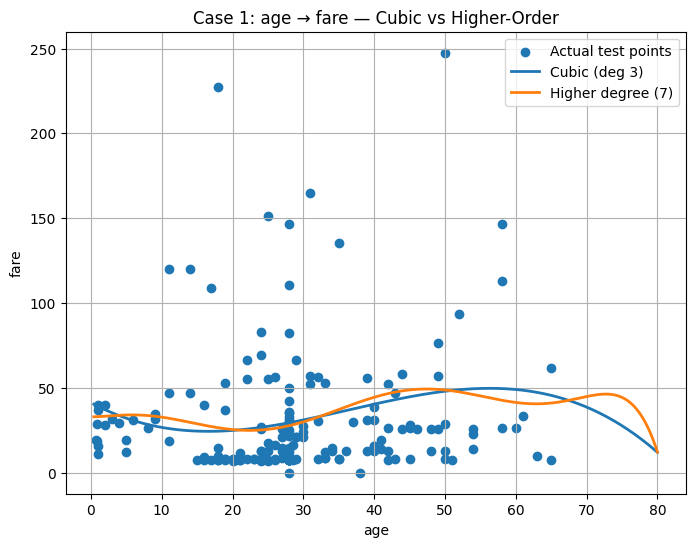

In [709]:


higher_degree = 7  # change as you like (4–8)

# Cubic fit
poly1_deg3 = PolynomialFeatures(degree=3)
X1_train_poly3 = poly1_deg3.fit_transform(X1_train)
X1_test_poly3  = poly1_deg3.transform(X1_test)
model1_deg3 = LinearRegression().fit(X1_train_poly3, y1_train)

# Higher-degree fit
poly1_high = PolynomialFeatures(degree=higher_degree)
X1_train_polyH = poly1_high.fit_transform(X1_train)
X1_test_polyH  = poly1_high.transform(X1_test)
model1_high = LinearRegression().fit(X1_train_polyH, y1_train)

# Smooth curve across age range
xgrid1 = np.linspace(float(X1_train.min()), float(X1_train.max()), 400).reshape(-1, 1)
ygrid1_deg3 = model1_deg3.predict(poly1_deg3.transform(xgrid1))
ygrid1_high = model1_high.predict(poly1_high.transform(xgrid1))

plt.figure(figsize=(8, 6))
plt.scatter(X1_test, y1_test, label="Actual test points")
plt.plot(xgrid1, ygrid1_deg3, linewidth=2, label="Cubic (deg 3)")
plt.plot(xgrid1, ygrid1_high, linewidth=2, label=f"Higher degree ({higher_degree})")
plt.title("Case 1: age → fare — Cubic vs Higher-Order")
plt.xlabel("age")
plt.ylabel("fare")
plt.legend()
plt.grid(True)
plt.show()


### Case 2 – Polynomial fit on family_size → fare (1 input)

C:\Users\alber\AppData\Local\Temp\ipykernel_25768\1607629555.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  xgrid2 = np.linspace(float(X2_train.min()), float(X2_train.max()), 400).reshape(-1, 1)
c:\Users\alber\applied-ml-kabore\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Users\alber\applied-ml-kabore\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


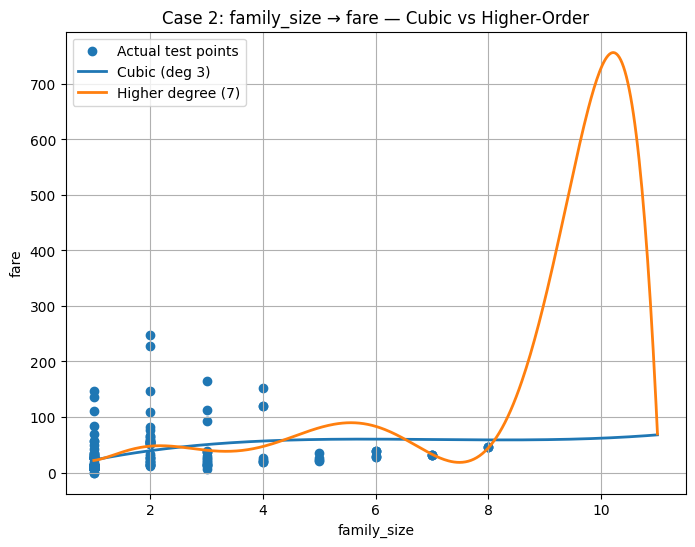

In [712]:


higher_degree = 7  # keep consistent or change per case

# Cubic fit
poly2_deg3 = PolynomialFeatures(degree=3)
X2_train_poly3 = poly2_deg3.fit_transform(X2_train)
X2_test_poly3  = poly2_deg3.transform(X2_test)
model2_deg3 = LinearRegression().fit(X2_train_poly3, y2_train)

# Higher-degree fit
poly2_high = PolynomialFeatures(degree=higher_degree)
X2_train_polyH = poly2_high.fit_transform(X2_train)
X2_test_polyH  = poly2_high.transform(X2_test)
model2_high = LinearRegression().fit(X2_train_polyH, y2_train)

# Smooth curve across family_size range
xgrid2 = np.linspace(float(X2_train.min()), float(X2_train.max()), 400).reshape(-1, 1)
ygrid2_deg3 = model2_deg3.predict(poly2_deg3.transform(xgrid2))
ygrid2_high = model2_high.predict(poly2_high.transform(xgrid2))

plt.figure(figsize=(8, 6))
plt.scatter(X2_test, y2_test, label="Actual test points")
plt.plot(xgrid2, ygrid2_deg3, linewidth=2, label="Cubic (deg 3)")
plt.plot(xgrid2, ygrid2_high, linewidth=2, label=f"Higher degree ({higher_degree})")
plt.title("Case 2: family_size → fare — Cubic vs Higher-Order")
plt.xlabel("family_size")
plt.ylabel("fare")
plt.legend()
plt.grid(True)
plt.show()


### Case 3 – Polynomial fit on age + family_size → fare (2 inputs)

Two 1-D slices for a 2-D model:

A) Vary age with family_size fixed at its median.

B) Vary family_size with age fixed at its median.

c:\Users\alber\applied-ml-kabore\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Users\alber\applied-ml-kabore\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


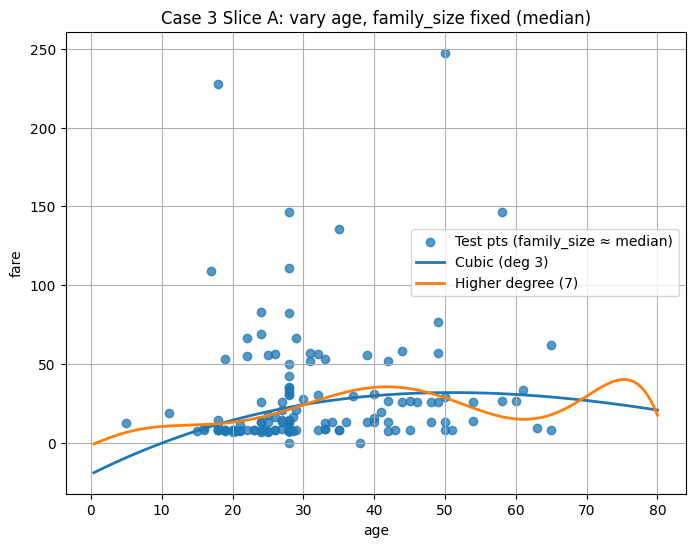

c:\Users\alber\applied-ml-kabore\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Users\alber\applied-ml-kabore\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


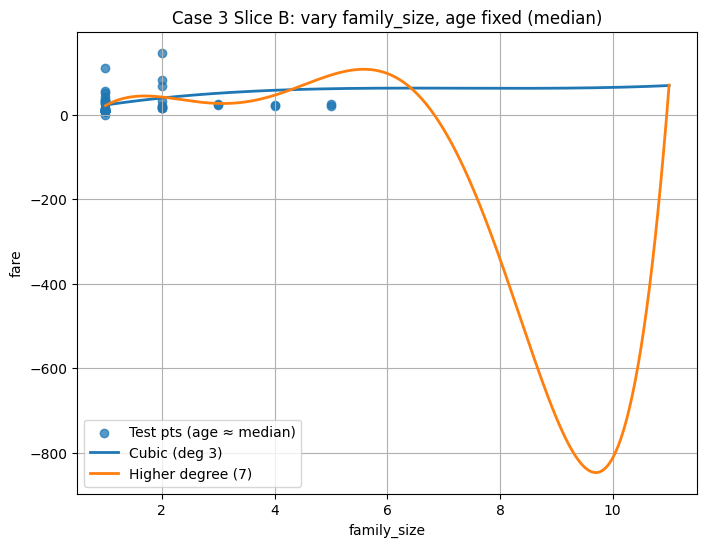

In [714]:
# --- Case 3: age + family_size (2D) ---


higher_degree = 7  # consistent with other cases

# Fit cubic & higher-degree on full 2D inputs
poly3_2d_deg3 = PolynomialFeatures(degree=3)
X3_train_poly3 = poly3_2d_deg3.fit_transform(X3_train)
model3_2d_deg3 = LinearRegression().fit(X3_train_poly3, y3_train)

poly3_2d_high = PolynomialFeatures(degree=higher_degree)
X3_train_polyH = poly3_2d_high.fit_transform(X3_train)
model3_2d_high = LinearRegression().fit(X3_train_polyH, y3_train)

# Medians (use TRAIN medians to avoid leakage)
fam_med = float(X3_train["family_size"].median())
age_med = float(X3_train["age"].median())

# --- Slice A: vary age, fix family_size = median
age_min, age_max = float(X3_train["age"].min()), float(X3_train["age"].max())
age_grid = np.linspace(age_min, age_max, 400)
X_slice_A = np.column_stack([age_grid, np.full_like(age_grid, fam_med)])

yA_deg3 = model3_2d_deg3.predict(poly3_2d_deg3.transform(X_slice_A))
yA_high = model3_2d_high.predict(poly3_2d_high.transform(X_slice_A))

plt.figure(figsize=(8, 6))
mask_A = np.isclose(X3_test["family_size"], fam_med, atol=1.0)
plt.scatter(X3_test.loc[mask_A, "age"], y3_test.loc[mask_A],
            label="Test pts (family_size ≈ median)", alpha=0.75)
plt.plot(age_grid, yA_deg3, linewidth=2, label="Cubic (deg 3)")
plt.plot(age_grid, yA_high, linewidth=2, label=f"Higher degree ({higher_degree})")
plt.title("Case 3 Slice A: vary age, family_size fixed (median)")
plt.xlabel("age")
plt.ylabel("fare")
plt.legend()
plt.grid(True)
plt.show()

# --- Slice B: vary family_size, fix age = median
fam_min, fam_max = float(X3_train["family_size"].min()), float(X3_train["family_size"].max())
fam_grid = np.linspace(fam_min, fam_max, 400)
X_slice_B = np.column_stack([np.full_like(fam_grid, age_med), fam_grid])

yB_deg3 = model3_2d_deg3.predict(poly3_2d_deg3.transform(X_slice_B))
yB_high = model3_2d_high.predict(poly3_2d_high.transform(X_slice_B))

plt.figure(figsize=(8, 6))
mask_B = np.isclose(X3_test["age"], age_med, atol=2.5)
plt.scatter(X3_test.loc[mask_B, "family_size"], y3_test.loc[mask_B],
            label="Test pts (age ≈ median)", alpha=0.75)
plt.plot(fam_grid, yB_deg3, linewidth=2, label="Cubic (deg 3)")
plt.plot(fam_grid, yB_high, linewidth=2, label=f"Higher degree ({higher_degree})")
plt.title("Case 3 Slice B: vary family_size, age fixed (median)")
plt.xlabel("family_size")
plt.ylabel("fare")
plt.legend()
plt.grid(True)
plt.show()


C:\Users\alber\AppData\Local\Temp\ipykernel_25768\3375677068.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  xgrid4 = np.linspace(float(X4_train.min()), float(X4_train.max()), 400).reshape(-1, 1)
c:\Users\alber\applied-ml-kabore\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Users\alber\applied-ml-kabore\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


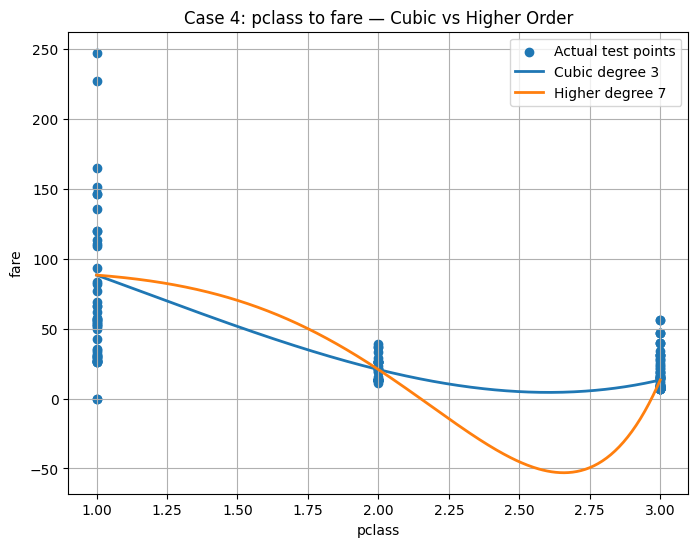

In [715]:


higher_degree = 7  # change if you want to compare a different degree

# Cubic fit
poly4_deg3 = PolynomialFeatures(degree=3)
X4_train_poly3 = poly4_deg3.fit_transform(X4_train)
X4_test_poly3  = poly4_deg3.transform(X4_test)
model4_deg3 = LinearRegression().fit(X4_train_poly3, y4_train)

# Higher degree fit
poly4_high = PolynomialFeatures(degree=higher_degree)
X4_train_polyH = poly4_high.fit_transform(X4_train)
X4_test_polyH  = poly4_high.transform(X4_test)
model4_high = LinearRegression().fit(X4_train_polyH, y4_train)

# Smooth curve across pclass range for visualization
xgrid4 = np.linspace(float(X4_train.min()), float(X4_train.max()), 400).reshape(-1, 1)
ygrid4_deg3 = model4_deg3.predict(poly4_deg3.transform(xgrid4))
ygrid4_high = model4_high.predict(poly4_high.transform(xgrid4))

plt.figure(figsize=(8, 6))
plt.scatter(X4_test, y4_test, label="Actual test points")
plt.plot(xgrid4, ygrid4_deg3, linewidth=2, label="Cubic degree 3")
plt.plot(xgrid4, ygrid4_high, linewidth=2, label=f"Higher degree {higher_degree}")
plt.title("Case 4: pclass to fare — Cubic vs Higher Order")
plt.xlabel("pclass")
plt.ylabel("fare")
plt.legend()
plt.grid(True)
plt.show()


### 5.5 Visualize Higher Order Polynomial (for the same 1 input case)
